## Project: Data Wrangle

In this project I used three datasets to wrangle (and then to analyze and visualize):

1. Dataframe named `tweets`: Tweet archive of Twitter user @dog_rates, also known as WeRateDogs. This dataset includes ratings of people's dogs with a humorous comment about the dog. -
2. Dataframe is named `images`. A Table of (dog breed) predictions gathered through a neural network using images.
3. Dataframe named `retweets`: Additional retweet and favorite counts of the tweets gathered from Twitter's API..

## Gather

#### Gather dataset #1

In [2]:
import pandas as pd
import numpy as np

In [3]:
tweets = pd.read_csv('twitter-archive-enhanced.csv')
tweets.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### Gather dataset #2

In [4]:
# The tweet image predictions is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL:
import requests
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [5]:
# save the file into your local computer
with open("images", mode='wb') as file:
    file.write(response.content)

In [6]:
# TSV is tab sepereated = \t and it is a flat file like csv so read_csv can read it. 
images = pd.read_csv('images', sep='\t')
images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Gather dataset #3

#### Code to query twitter API. This code only works with a twitter developer account. Since I do not have a developer account, I will only be pasting it down without using:

In [1222]:
# USE THIS LINE FIRST IF THE BELOW CODE DOES NOT WORK:
# !pip install tweepy
# (where ! tells the notebook that it is a shell command (a command normally run on the command line))

import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = tweets.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
11: 890006608113172480
Fail
12: 889880896479866881
Fail
13: 889665388333682689
Fail
14: 889638837579907072
Fail
15: 889531135344209921
Fail
16: 889278841981685760
Fail
17: 888917238123831296
Fail
18: 888804989199671297
Fail
19: 888554962724278272
Fail
20: 888202515573088257
Fail
21: 888078434458587136
Fail
22: 887705289381826560
Fail
23: 887517139158093824
Fail
24: 887473957103951883
Fail
25: 887343217045368832
Fail
26: 887101392804085760
Fail
27: 886983233522544640
Fail
28: 886736880519319552
Fail
29: 886680336477933568
Fail
30: 886366144734445568
Fail
31: 886267009285017600
Fail
32: 886258384151887873
Fail
33: 886054160059072513
Fail
34: 885984800019947520
Fail
35: 885528943205470208
Fail
36: 885518971528720385
Fail
3

In [7]:
# The tweet_json file provided has tweets on each line. So you need to use the `lines = True` argument
# read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count.
retweets = pd.read_json('tweet-json.txt', lines=True)
retweets = retweets[['id','retweet_count', 'favorite_count']]
retweets.head(5)

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Assess

In [8]:
tweets.info(5)
# based on this there are 78 replies and 181 retweets, which are not supposed to be part of the dataset. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [9]:
tweets.sample(10)
# 1 variable (dog stage) in 4 columns (duggo, floofer, pupper, puppo). 
# Some wrong dog names
# String "none" rather than null for the last 5 variables.

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1898,674690135443775488,NaN,NaN,2015-12-09 20:40:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Patrick. He's an exotic pup. Jumps great ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674690135...,3,10,Patrick,None,None,None,None
1354,703631701117943808,NaN,NaN,2016-02-27 17:24:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. Based on this picture she's at ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/703631701...,11,10,Bella,None,None,None,None
1621,684926975086034944,NaN,NaN,2016-01-07 02:38:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Bruiser &amp; Charlie. They are the best ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684926975...,11,10,Bruiser,None,None,None,None
1388,700462010979500032,NaN,NaN,2016-02-18 23:28:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Murphy. He's a mini golden retriever. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/700462010...,6,10,Murphy,None,None,None,None
1520,690728923253055490,NaN,NaN,2016-01-23 02:53:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Vinscent. He was just questioned about...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/690728923...,8,10,Vinscent,None,None,None,None
1390,700151421916807169,NaN,NaN,2016-02-18 02:54:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",If a pupper gave that to me I'd probably start...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/700151421...,11,10,None,None,None,pupper,None
1049,743222593470234624,NaN,NaN,2016-06-15 23:24:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a very rare Great Alaskan Bush Pupper....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743222593...,12,10,a,None,None,pupper,None
122,869227993411051520,NaN,NaN,2017-05-29 16:24:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gizmo. His favorite thing is standing ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/869227993...,13,10,Gizmo,None,None,None,None
284,838921590096166913,NaN,NaN,2017-03-07 01:17:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Arlo. He's officially the king of snow...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/838921590...,13,10,Arlo,None,None,None,None
2117,670421925039075328,NaN,NaN,2015-11-28 02:00:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Herb. 12/10 https://t.co/tLRyYvCci3,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670421925...,12,10,Herb,None,None,None,None


In [10]:
tweets.name.value_counts()

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
          ... 
Millie       1
Jareld       1
Zoe          1
Randall      1
Banditt      1
Name: name, Length: 957, dtype: int64

In [14]:
tweets.name.sample(30)
# run this code a few times, all incorrect names seem to start with a lower case letter except None

214            Iggy
33            Jimbo
1187          Bowie
1776           Izzy
1035           Abby
22             such
108        Napolean
216            Kyle
1118          Larry
4          Franklin
1417         Claude
453         Chelsea
520             Gus
128          Harold
1912           Gary
792     Shakespeare
2188         Jeremy
85            Venti
1651        Griffin
2320           None
1404        Calbert
1789           None
1459           None
1608           Otis
2304              a
709            Hero
645           Benji
559         Winston
80            Dante
47             None
Name: name, dtype: object

In [15]:
# making sure there is no typo
print(tweets['doggo'].value_counts())
print(tweets['floofer'].value_counts())
print(tweets['pupper'].value_counts())
print(tweets['puppo'].value_counts())

None     2259
doggo      97
Name: doggo, dtype: int64
None       2346
floofer      10
Name: floofer, dtype: int64
None      2099
pupper     257
Name: pupper, dtype: int64
None     2326
puppo      30
Name: puppo, dtype: int64


In [16]:
tweets[['rating_numerator', 'rating_denominator']].describe()
# some seemingly wrong numbers with a min of 0 and a max of 1776

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [17]:
tweets.rating_numerator.value_counts()
# majority of the data is between 14-0 which makes sense. 

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
0         2
15        2
75        2
420       2
182       1
204       1
143       1
121       1
99        1
20        1
45        1
27        1
17        1
24        1
26        1
44        1
50        1
60        1
80        1
84        1
88        1
1776      1
960       1
666       1
144       1
165       1
Name: rating_numerator, dtype: int64

In [18]:
tweets.rating_denominator.value_counts()
# majority of the data is 10. 

10     2333
11        3
50        3
20        2
80        2
0         1
120       1
7         1
170       1
150       1
130       1
90        1
110       1
2         1
70        1
40        1
16        1
15        1
Name: rating_denominator, dtype: int64

In [19]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [20]:
images.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [21]:
images.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1011,709449600415961088,https://pbs.twimg.com/media/Cdh4pgAW0AEKJ_a.jpg,2,Maltese_dog,0.780187,True,Dandie_Dinmont,0.074429,True,Norfolk_terrier,0.033776,True
551,677557565589463040,https://pbs.twimg.com/media/CWcrAVQWEAA6QMp.jpg,1,seat_belt,0.277257,False,Shih-Tzu,0.249017,True,Pekinese,0.209213,True
911,700796979434098688,https://pbs.twimg.com/media/Cbm7IeUXIAA6Lc-.jpg,1,tailed_frog,0.652712,False,tree_frog,0.280212,False,bullfrog,0.040177,False
1501,784431430411685888,https://pbs.twimg.com/media/CuLcNkCXgAEIwK2.jpg,1,miniature_poodle,0.744819,True,toy_poodle,0.243192,True,standard_poodle,0.010920,True
500,675845657354215424,https://pbs.twimg.com/media/CWEWClfW4AAnqhG.jpg,1,pug,0.883952,True,Boston_bull,0.011057,True,French_bulldog,0.009840,True


In [22]:
images.p1.value_counts()
# names start with a mix of upper and lower case

golden_retriever            150
Labrador_retriever          100
Pembroke                     89
Chihuahua                    83
pug                          57
                           ... 
sulphur-crested_cockatoo      1
china_cabinet                 1
African_crocodile             1
mortarboard                   1
lacewing                      1
Name: p1, Length: 378, dtype: int64

In [23]:
retweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [24]:
retweets.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [25]:
retweets.sample(5)

,id,retweet_count,favorite_count
1759,678675843183484930,1680,3155
2337,666102155909144576,16,81
2265,667524857454854144,1198,1798
199,854010172552949760,3433,17169
1394,699788877217865730,557,2458


In [26]:
# making sure no twitter id has been replicated in any of the datasets
print(sum(tweets.tweet_id.duplicated()))
print(sum(images.tweet_id.duplicated()))
print(sum(retweets.id.duplicated()))

0
0
0


## Quality


#### `tweets` table:

1. Non-original tweets - specifically **retweets and replies** that need to be removed.
    - The rows in column `retweeted_status_id` which contained **non-null** values need to be removed.
    - The rows in column `in_reply_to_status_id` which contained **non-null** values need to be removed.
    
2. String value "None" which appears in the dog stages columns and in the `name` column need to be replaced by NaN or null.

3. Incorrect dog name values in the `name` column such as "a","this","the" etc. One commonality was that all those values started with a lowercase letter, so the dog names that started with a lower case letter can be removed.

4. Column `timestampappears` appears as a string data type, but has to be converted to datetime data type.

5. Some incorrect values for `rating_numerator`. Some values are too high such as 1776. Identify incorrect values and either remove or replace them. 

6. Some incorrect values for `rating_denominator`. Ideally they should all have been 10. Identify incorrect values and either remove or replace them. 

#### `images` table:

7. Inconsistent use of lower/upper case letters for dog breeds: `p1`, `p2`, and `p3`. All dog names need to be fixed by converting to lower case letters. 

####  `retweets` table:
- No issues are detected.

#### Common to `all tables`:
8. ID columns (`tweet_id` in `tweets` and `images`; and `id` in `retweets` appear as a float datatype. They need to be converted to a string datatype because we won't be performing calculations on them, and a bigger/smaller value does not mean anything.


### Tidiness:
#### `tweets` table:

1. 1 variable in 4 columns. The dog stages (`doggo`, `floofer`, `pupper`, `puppo`) appear in 4 different columns, but they have to be merged into one additional column such as `dog_stage`. In tidy data each variable forms a column. 

#### `images` table:

2. An additional variables need to be created which merges all three predictions into 1 for ease of analyses. 

#### `all tables`:

3. Column  `id` in `retweets` table need to be renamed as `tweet_id` for consistency with the other tables. And then the 3 tables could be into one master data set using `tweet_id` as the merging variable. Unnecessary columns from the master data set need to be dropped.

### Create a clean copy before moving forward with cleaning:

In [27]:
tweets_clean = tweets.copy()
images_clean = images.copy()
retweets_clean = retweets.copy()

## Clean

#### Define #1
- **Retweets**: Remove the rows from `tweets_clean`  where `retweeted_status_id` contains non-null values. Dataframe currently denotes 181 non-null values for `retweeted_status_id`, `retweeted_status_user_id` and `retweeted_status_timestamp`. 
- **Replies**: Remove the rows from `tweets_clean` table where `in_reply_to_status_id` contains non-null values. Dataframe currently denotes 78 non-null values for `in_reply_to_status_id` and `in_reply_to_user_id`.

#### Code

In [28]:
# making sure that all these 3 columns match in terms of non-null values:
print(sum(tweets.retweeted_status_id.isnull() != tweets.retweeted_status_user_id.isnull()))
print(sum(tweets.retweeted_status_user_id.isnull() != tweets.retweeted_status_timestamp.isnull()))
print(sum(tweets.retweeted_status_id.isnull() != tweets.retweeted_status_timestamp.isnull()))

0
0
0


In [29]:
# making sure these 2 columns match in terms of non-null values:
sum(tweets.in_reply_to_status_id.isnull() != tweets.in_reply_to_status_id.isnull())

0

In [30]:
# drop the retweets
tweets_clean = tweets_clean[tweets_clean.retweeted_status_id.isnull()!= False]

In [31]:
# drop the replies
tweets_clean = tweets_clean[tweets_clean.in_reply_to_status_id.isnull()!= False]

#### Test

In [32]:
sum(tweets_clean.retweeted_status_id.isnull() == False)

0

In [33]:
sum(tweets_clean.in_reply_to_status_id.isnull() == False)

0

In [34]:
tweets_clean.shape
# number of rows dropped to 2097

(2097, 17)

#### Define #2
- Replace "None" in `name` column and `dog stage columns` with an empty string (null). 

Isses:
- For `name`, I will be using **NaN**, because emptying the cell is not treated as null when using isnull() or when I look up the info(). 
- For the `dog stages`, instead of NaN I will be using **' '** because I want to be able to concatenate these values into one column.  

#### Code

In [35]:
tweets_clean.name.replace('None',np.nan, inplace=True)
tweets_clean.doggo.replace('None','', inplace=True)
tweets_clean.floofer.replace('None','', inplace=True)
tweets_clean.pupper.replace('None','', inplace=True)
tweets_clean.puppo.replace('None','', inplace=True)

#### Test

In [36]:
print(sum(tweets_clean.name == None))
print(sum(tweets_clean.doggo == None))
print(sum(tweets_clean.floofer == None))
print(sum(tweets_clean.pupper == None))
print(sum(tweets_clean.puppo == None))

0
0
0
0
0


#### Define #3
-  Wrong `dog` names, several tweets have values that are not dog names such as "a","this","the" etc. One commonality is that all those values start with a lowercase letter. Remove the dog names that start with a lower case letter. 

#### Code

In [37]:
tweets_clean.loc[tweets_clean.name.str.islower()==True,'name'] = np.nan

#### Test

In [38]:
sum(tweets_clean.name.str.islower()== True)

0

In [39]:
sum(tweets_clean.name.isnull() == True)

707

In [40]:
tweets_clean.name.sample(20)

2136          Tommy
493             NaN
1285         Bobble
1937           Obie
2179         Tucker
1817       Godzilla
21          Jeffrey
1718            NaN
1115        Aldrick
894            Luna
985          Boomer
792     Shakespeare
172             NaN
1392           Eazy
1485         Dunkin
1775          Reese
1300        Jiminus
1264         Watson
1028            Gus
1269          Vince
Name: name, dtype: object

#### Define #4
- Column `timestamp`appears as string data type, convert it to datetime data type. 

#### Code

In [41]:
tweets_clean['timestamp'] = pd.to_datetime(tweets_clean['timestamp'])

#### Test

In [42]:
tweets_clean.timestamp.sample(20)

1513   2016-01-24 03:14:07+00:00
1694   2015-12-28 01:12:59+00:00
973    2016-07-04 21:00:04+00:00
1448   2016-02-07 18:51:43+00:00
935    2016-07-14 01:19:12+00:00
2051   2015-12-01 00:38:31+00:00
2022   2015-12-02 15:01:33+00:00
1779   2015-12-18 05:06:23+00:00
2109   2015-11-28 03:49:14+00:00
954    2016-07-09 15:02:31+00:00
591    2016-11-17 01:35:54+00:00
776    2016-09-14 17:40:06+00:00
1511   2016-01-25 00:26:41+00:00
1147   2016-05-02 00:43:25+00:00
920    2016-07-22 01:42:09+00:00
356    2017-02-12 01:04:29+00:00
43     2017-07-09 21:29:42+00:00
1477   2016-01-31 02:31:43+00:00
1786   2015-12-17 19:39:03+00:00
821    2016-08-29 16:14:30+00:00
Name: timestamp, dtype: datetime64[ns, UTC]

#### Define #5
- Remove the rows with incorrect values for `rating_numerator`. We need to examine data a bit more to determine which values to remove and which ones to modify and keep. We need to look into particular tweet URLs. 

#### Code

In [43]:
tweets_clean.rating_numerator.value_counts()

12      486
10      436
11      413
13      287
9       153
8        98
7        52
14       38
5        34
6        32
3        19
4        16
2         9
1         5
0         1
27        1
45        1
99        1
121       1
75        1
144       1
1776      1
420       1
204       1
88        1
84        1
80        1
60        1
50        1
44        1
26        1
24        1
165       1
Name: rating_numerator, dtype: int64

I will assume that a range between 2-14, which is the majority of the data is correct. Let us check out the individual tweet URLs for `rating_numerator` 0,1 and greater than 14.

- Issue: Pandas display truncated URL information.
- In order to be able to open up full URLs, below code is gathered from:
https://stackoverflow.com/questions/25351968/how-to-display-full-non-truncated-dataframe-information-in-html-when-convertin


In [44]:
pd.set_option('display.max_colwidth', -1)
print(tweets_clean.query('rating_numerator ==0')['expanded_urls'])
print(tweets_clean.query('rating_numerator ==1')['expanded_urls'])
print(tweets_clean.query('rating_numerator ==24')['expanded_urls'])
print(tweets_clean.query('rating_numerator ==26')['expanded_urls'])
print(tweets_clean.query('rating_numerator ==27')['expanded_urls'])
print(tweets_clean.query('rating_numerator ==44')['expanded_urls'])
print(tweets_clean.query('rating_numerator ==45')['expanded_urls'])
print(tweets_clean.query('rating_numerator ==50')['expanded_urls'])
print(tweets_clean.query('rating_numerator ==60')['expanded_urls'])
print(tweets_clean.query('rating_numerator ==75')['expanded_urls'])
print(tweets_clean.query('rating_numerator ==80')['expanded_urls'])
print(tweets_clean.query('rating_numerator ==84')['expanded_urls'])
print(tweets_clean.query('rating_numerator ==88')['expanded_urls'])
print(tweets_clean.query('rating_numerator ==99')['expanded_urls'])
print(tweets_clean.query('rating_numerator ==121')['expanded_urls'])
print(tweets_clean.query('rating_numerator ==144')['expanded_urls'])
print(tweets_clean.query('rating_numerator ==165')['expanded_urls'])
print(tweets_clean.query('rating_numerator ==204')['expanded_urls'])
print(tweets_clean.query('rating_numerator ==420')['expanded_urls'])
print(tweets_clean.query('rating_numerator ==1776')['expanded_urls'])

315    https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1
Name: expanded_urls, dtype: object
1869    https://twitter.com/dog_rates/status/675153376133427200/photo/1
2091    https://twitter.com/dog_rates/status/670783437142401025/photo/1
2261    https://twitter.com/dog_rates/status/667549055577362432/photo/1
2335    https://twitter.com/dog_rates/status/666287406224695296/photo/1
2338    https://twitter.com/dog_rates/status/666104133288665088/photo/1
Name: expanded_urls, dtype: object
516    https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1
Name: expanded_urls, dtype: object
1712    https://twitter.com/dog_rates/status/680494726643068929/photo/1
Name: expanded_urls, dtype: object
763    https://twitter.com/dog_rates/status/778027034220126208/photo/1
Name: expanded_urls, dtype: object
1433    https://

<ipython-input-44-12fb80ebae9e>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


#### How to correct for values:

- Three of the tweets have ratings of 11.26/10, 11.27/10 and 9.75/10. They should have been coded as a float datatype, but since the datatype is integer only the decimal points were registered. Let's fix this by rounding these numbers up the nearest integers and making the changes. For future reference: ideally it would have been better to extract all the ratings as floats rather than integers.

- Majority of these tweets have bigger values because they refer to multiple dogs. Assuming most of them represent the same breed etc., we can divide these numbers by the number of dogs. Also ideally the dog number could be extracted programmatically from the denominator, but it would be tricky to write the code, so I will do it manually since there are not too many of them. 

- Index number 2335 needs to be dealed seperately. It is one of the 5 tweets with a rating of 1, but the only one incorrectly coded. Let's correct both numerator and denominator for this one. 

- Drop the row with an outlier rating of 1776/10 (the dog is marvelous though), because otherwise it would affect the analyses. 

- Drop the row with a rating of 420 as well although this one is not a dog, so it would not matter much.

- Let's also drop the rows with nonworking twitter URLs since we could not use their tweets to make an informed decision. (0, 24, 84, 88)

In [45]:
tweets_clean.rating_numerator = tweets_clean.rating_numerator.replace([26,27,44,45,50,60,75,80,99,121,144,165,204],[11,11,11,9,11,12,10,10,11,11,12,11,12])


In [46]:
tweets_clean = tweets_clean.drop(tweets_clean.query('rating_numerator == [0, 24, 84, 88, 420, 1776]').index)


#### test

In [47]:
print(tweets_clean.query('rating_numerator == 26'))
print(tweets_clean.query('rating_numerator == 144'))
print(tweets_clean.query('rating_numerator == 0'))
print(tweets_clean.query('rating_numerator == 24'))
print(tweets_clean.query('rating_numerator == 1776'))

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []
Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []
Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []
Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweete

#### code 

- Let's correct both numerator and denominator for ten tweet with index number == 2335  
- We cannot use `replace()` since there are multiple tweets with a numerator of 1. 
- Use loc for editing the values for specific cells. 

In [48]:
tweets_clean.query('index == 2335')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406224695296/photo/1,1,2,NaN,,,,


##### QUESTION: IS THERE A WAY TO MAKE THIS WORK BY "INDEX NUMBER" RATHER THAN RATING NUM AND DENOM?

In [49]:
tweets_clean.loc[(tweets_clean.rating_numerator== 1) & (tweets_clean.rating_denominator== 2),'rating_numerator'] = 9
tweets_clean.loc[(tweets_clean.rating_numerator== 9) & (tweets_clean.rating_denominator== 2),'rating_denominator'] = 10


#### test

In [50]:
tweets_clean.query('index == 2335')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406224695296/photo/1,9,10,NaN,,,,


In [51]:
tweets_clean.rating_numerator.value_counts()

12    489
10    438
11    420
13    287
9     155
8     98 
7     52 
14    38 
5     34 
6     32 
3     19 
4     16 
2     9  
1     4  
Name: rating_numerator, dtype: int64

#### Define #5
Remove the rows with incorrect values for `rating_denominator`:
- Looking into the value_counts many of the values larger than 10 are multiplies of 10, so they seem to belong to multiple dogs. We will replace these values by 10. 
- As for denom # 11 which appears in 2 tweets, we will check out the tweet URLs first. One of the tweets are absent. Let's remove this tweet. Other was was coded as 7/11 rather than 10/10. Let's replace both numerator and denominator for this particular tweet. 

#### Code

In [52]:
tweets_clean.rating_denominator.value_counts()

10     2078
50     3   
11     2   
20     1   
40     1   
80     1   
90     1   
110    1   
120    1   
150    1   
170    1   
Name: rating_denominator, dtype: int64

In [53]:
pd.set_option('display.max_colwidth', -1)
print(tweets_clean.query('rating_denominator ==11')['expanded_urls'])

1068    https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1
1662    https://twitter.com/dog_rates/status/682962037429899265/photo/1                                                                                                                                                                                                
Name: expanded_urls, dtype: object


<ipython-input-53-f7f876a96527>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


#### Code

In [54]:
tweets_clean.rating_denominator = tweets_clean.rating_denominator.replace([50,20,40,80,90,110,120,150,170],[10,10,10,10,10,10,10,10,10])

#### Test

In [55]:
print(tweets_clean.query('rating_denominator == 50'))
print(tweets_clean.query('rating_denominator == 90'))

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []
Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []


#### Code

In [56]:
tweets_clean.query('index==1662')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1662,682962037429899265,NaN,NaN,2016-01-01 16:30:13+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682962037429899265/photo/1,7,11,Darrel,,,,


In [57]:
tweets_clean.loc[(tweets_clean.rating_numerator== 7) & (tweets_clean.rating_denominator== 11),'rating_numerator'] = 10
tweets_clean.loc[(tweets_clean.rating_numerator== 10) & (tweets_clean.rating_denominator== 11),'rating_denominator'] = 10

#### Test

In [58]:
tweets_clean.query('index==1662')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1662,682962037429899265,NaN,NaN,2016-01-01 16:30:13+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682962037429899265/photo/1,10,10,Darrel,,,,


#### Code

In [59]:
# remove the row with the index number 2893 
tweets_clean = tweets_clean.drop(1068)

#### Test

In [60]:
tweets_clean.query('index==1068')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [61]:
# last test code to make sure all denominators are 10.
tweets_clean.rating_denominator.value_counts()

10    2090
Name: rating_denominator, dtype: int64

#### Define #7
- In`images` table: Some predicted dog breed names start with small case, some start with an upper case. Convert them all lower case. 

#### Code

In [62]:
images_clean.p1 = images_clean.p1.str.lower()
images_clean.p2 = images_clean.p2.str.lower()
images_clean.p3 = images_clean.p3.str.lower()

#### Test

In [63]:
images_clean.p1.sample(10)

462     english_springer              
1319    airedale                      
529     chihuahua                     
1354    radio_telescope               
110     pomeranian                    
1790    toy_poodle                    
758     american_staffordshire_terrier
1678    cocker_spaniel                
1484    tennis_ball                   
10      golden_retriever              
Name: p1, dtype: object

#### Define #7
-  ID columns (`tweet_id` in `tweets` and `images`; and 
`id` in `retweets` should be strings, not integers/floats because we won't be performing calculations on them, and a bigger/smaller value does not mean anything. 

#### Code

In [64]:
tweets_clean['tweet_id']= tweets_clean['tweet_id'].astype(str)
images_clean['tweet_id']= images_clean['tweet_id'].astype(str)
retweets_clean['id']= retweets_clean['id'].astype(str)

#### Test

In [65]:
print(tweets_clean['tweet_id'].dtypes)
print(images_clean['tweet_id'].dtypes)
print(retweets_clean['id'].dtypes)

object
object
object


## TIDINESS

#### Define #1
-  1 variable in 4 columns in `tweets` table. The dog stages (`doggo`, `floofer`, `pupper`, `puppo`) currently appear in 4 different columns, but they need to be condensed into one column such as `dog_stage`. In tidy data each variable forms a column. 
-  There are cases where multiple dog stages were entered, those were separated by a comma. 

PS: For an issue that came up I revised the way null values were treated for the dog stages above in quality issue #2. 

#### Code

In [66]:
tweets_clean['dog_stage'] = tweets_clean.doggo + tweets_clean.floofer + tweets_clean.pupper + tweets_clean.puppo

#### Test

In [67]:
tweets_clean['dog_stage'].value_counts()

                1754
pupper          221 
doggo           72  
puppo           23  
doggopupper     9   
floofer         9   
doggofloofer    1   
doggopuppo      1   
Name: dog_stage, dtype: int64

#### code

In [68]:
# format multiple dog stages
tweets_clean.loc[tweets_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
tweets_clean.loc[tweets_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
tweets_clean.loc[tweets_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

#### Test

In [69]:
tweets_clean.loc[tweets_clean.dog_stage == 'doggopupper'] 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage


In [70]:
tweets_clean.loc[tweets_clean.dog_stage == 'doggo, pupper', 'dog_stage']

460     doggo, pupper
531     doggo, pupper
575     doggo, pupper
705     doggo, pupper
733     doggo, pupper
889     doggo, pupper
956     doggo, pupper
1063    doggo, pupper
1113    doggo, pupper
Name: dog_stage, dtype: object

In [71]:
tweets_clean['dog_stage'].value_counts()

                  1754
pupper            221 
doggo             72  
puppo             23  
floofer           9   
doggo, pupper     9   
doggo, floofer    1   
doggo, puppo      1   
Name: dog_stage, dtype: int64

#### Define #2
-  In `images` table create another variable that merges all three predictions into one for ease of analyses. This was achieved using a for loop using certain criteria such as the image had to be identified as a dog and the algorithm had to achieve a certain treshold in confidence. 

#### Code


In [72]:
images_clean[images_clean.p1_dog == True]['p1_conf'].describe()

count    1532.000000
mean     0.613823   
std      0.259735   
min      0.044333   
25%      0.390981   
50%      0.614025   
75%      0.850559   
max      0.999956   
Name: p1_conf, dtype: float64

In [73]:
images_clean[images_clean.p2_dog == True]['p1_conf'].describe()

count    1553.000000
mean     0.615391   
std      0.261032   
min      0.044333   
25%      0.393527   
50%      0.613819   
75%      0.855959   
max      0.999984   
Name: p1_conf, dtype: float64

In [74]:
images_clean[images_clean.p3_dog == True]['p1_conf'].describe()

count    1499.000000
mean     0.612979   
std      0.261075   
min      0.044333   
25%      0.392932   
50%      0.615163   
75%      0.848882   
max      0.999984   
Name: p1_conf, dtype: float64

**Based on the summary stats above there is no way to tell if a certain treshold is meaningful, I will arbitrarily choose 0.4 (25th percentile).** 

In [75]:
# combine breed predictions into one column:
cut_off = 0.4
breed_predictions = []
for i in range(len(images_clean)):
    if images_clean['p1_dog'][i] == True and images_clean['p1_conf'][i] > cut_off:
        breed_predictions.append(images_clean['p1'][i])
    elif images_clean['p2_dog'][i]== True and images_clean['p2_conf'][i] > cut_off:
        breed_predictions.append(images_clean['p2'][i])
    elif images_clean['p3_dog'][i]== True and images_clean['p2_conf'][i] > cut_off:
        breed_predictions.append(images_clean['p3'][i])
    else:
        breed_predictions.append('')
        
# create a new column and assign the results to the new column 'breed_pred'     
images_clean['breed_pred'] = breed_predictions

In [76]:
images_clean.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed_pred
2043,885984800019947520,https://pbs.twimg.com/media/DEumeWWV0AA-Z61.jpg,1,blenheim_spaniel,0.972494,True,shih-tzu,0.006630,True,bernese_mountain_dog,0.006239,True,blenheim_spaniel
1559,793256262322548741,https://pbs.twimg.com/media/CwI2XCvXEAEO8mc.jpg,1,basset,0.207622,True,walker_hound,0.060574,True,beagle,0.041221,True,
358,672614745925664768,https://pbs.twimg.com/media/CVWbitUW4AAzclx.jpg,1,starfish,0.712717,False,goldfish,0.258865,False,sea_cucumber,0.002015,False,
445,674646392044941312,https://pbs.twimg.com/media/CVzTUGrW4AAirJH.jpg,1,flat-coated_retriever,0.837448,True,groenendael,0.086166,True,labrador_retriever,0.016052,True,flat-coated_retriever
1974,869772420881756160,https://pbs.twimg.com/media/DBINZcxXgAQ-R6P.jpg,1,pembroke,0.980148,True,cardigan,0.019271,True,malamute,0.000136,True,pembroke
1455,777621514455814149,https://pbs.twimg.com/media/Csqqoo5WEAAMTVW.jpg,1,chow,0.999823,True,norwich_terrier,0.000056,True,pomeranian,0.000028,True,chow
1451,776477788987613185,https://pbs.twimg.com/media/CsaaaaxWgAEfzM7.jpg,1,labrador_retriever,0.884839,True,chesapeake_bay_retriever,0.057565,True,paintbrush,0.005766,False,labrador_retriever
553,677573743309385728,https://pbs.twimg.com/media/CWc5uVPXIAErLYr.jpg,2,patio,0.535070,False,folding_chair,0.080419,False,parallel_bars,0.034796,False,
1190,739844404073074688,https://pbs.twimg.com/media/CkR0jrhWYAALL5N.jpg,1,toy_poodle,0.342397,True,table_lamp,0.104451,False,miniature_poodle,0.079871,True,
453,674754018082705410,https://pbs.twimg.com/media/CV01M3ZWIAAV7rv.jpg,1,seashore,0.352321,False,promontory,0.131753,False,wreck,0.095597,False,


In [77]:
images_clean['breed_pred'].value_counts()

                       939
golden_retriever       131
labrador_retriever     83 
pembroke               81 
chihuahua              58 
                       .. 
irish_water_spaniel    1  
clumber                1  
giant_schnauzer        1  
appenzeller            1  
standard_schnauzer     1  
Name: breed_pred, Length: 107, dtype: int64

#### Define #3
-  First in the `retweets` table, rename `id` to `tweet_id`. Then merge all 3 tables into one master data set using `tweet_id` as the merging variable. I need to merge two at a time. 
- Then drop the unnecessary columns.

#### Code

In [78]:
retweets_clean.rename(columns = {'id':'tweet_id'}, inplace=True)

In [79]:
tweets_master = pd.merge(tweets_clean, images_clean, on=['tweet_id'], how='left')


In [80]:
tweets_master = pd.merge(tweets_master, retweets_clean, on=['tweet_id'], how='left')


#### Test

In [81]:
tweets_master.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed_pred,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,False,bagel,0.085851,False,banana,0.076110,False,,8853,39467
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,...,True,pekinese,0.090647,True,papillon,0.068957,True,,6514,33819
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,...,True,malamute,0.078253,True,kelpie,0.031379,True,chihuahua,4328,25461
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,...,False,labrador_retriever,0.168086,True,spatula,0.040836,False,,8964,42908
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",...,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True,basset,9774,41048


In [82]:
tweets_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2090 entries, 0 to 2089
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2090 non-null   object             
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2090 non-null   datetime64[ns, UTC]
 4   source                      2090 non-null   object             
 5   text                        2090 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2087 non-null   object             
 10  rating_numerator            2090 non-null   int64           

In [83]:
tweets_master.drop(['in_reply_to_status_id','in_reply_to_user_id',
                    'source',
                    'retweeted_status_id','retweeted_status_user_id', 'retweeted_status_timestamp',
                    'doggo', 'floofer', 'pupper','puppo', 
                    'img_num', 
                    'p1', 'p1_conf', 'p1_dog', 
                    'p2', 'p2_conf', 'p2_dog', 
                    'p3', 'p3_conf', 'p3_dog'], axis =1, inplace=True)

In [84]:
tweets_master.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,breed_pred,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,,8853,39467
1,892177421306343426,2017-08-01 00:17:27+00:00,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,,6514,33819
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,chihuahua,4328,25461
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,,8964,42908
4,891327558926688256,2017-07-29 16:00:24+00:00,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,9774,41048


**Save the gathered, assessed, and cleaned master dataset(s) to a CSV file:**

In [85]:
tweets_master.to_csv(r'/Users/aysuerdemir/Desktop/UDACITY_DataAnalytics/Project4-WrangleData/tweets_master.csv', index = False)

## EXPLORATORY ANALYSIS

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [87]:
tweeter = pd.read_csv('tweets_master.csv')
tweeter.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,breed_pred,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,NaN,8853,39467
1,892177421306343426,2017-08-01 00:17:27+00:00,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,NaN,6514,33819
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,chihuahua,4328,25461
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,NaN,8964,42908
4,891327558926688256,2017-07-29 16:00:24+00:00,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,9774,41048


### Q1: WHICH DOG STAGES GOT THE HIGHEST RATINGS FROM WE_RATE_DOGS OR RETWEETS/FAVORITES FROM THE FOLLOWERS? DO YOUNG PUPPERS GET HIGHER SCORES THAN MATURE DOGGOS? 

In [88]:
tweeter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2090 entries, 0 to 2089
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2090 non-null   int64 
 1   timestamp           2090 non-null   object
 2   text                2090 non-null   object
 3   expanded_urls       2087 non-null   object
 4   rating_numerator    2090 non-null   int64 
 5   rating_denominator  2090 non-null   int64 
 6   name                1388 non-null   object
 7   dog_stage           336 non-null    object
 8   jpg_url             1964 non-null   object
 9   breed_pred          1083 non-null   object
 10  retweet_count       2090 non-null   int64 
 11  favorite_count      2090 non-null   int64 
dtypes: int64(5), object(7)
memory usage: 196.1+ KB


In [89]:
tweeter.dog_stage.value_counts()

pupper            221
doggo             72 
puppo             23 
floofer           9  
doggo, pupper     9  
doggo, floofer    1  
doggo, puppo      1  
Name: dog_stage, dtype: int64

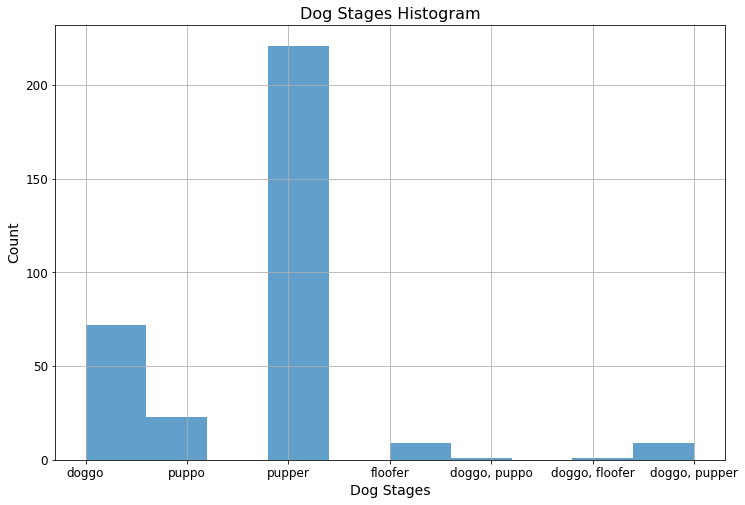

In [1396]:
tweeter.dog_stage.hist(figsize=(12,8),alpha=.7);
plt.title('Dog Stages Histogram', fontsize=16);
plt.xlabel ('Dog Stages', fontsize=14)
plt.ylabel ('Count', fontsize=14)
plt.xticks(fontsize=12);  
plt.yticks(fontsize=12);

**Issue**: Not many of the dogs have been identified for stage (only 336), and already more puppers were specified (which creates an isse of balance), but we will still compare the mean rating values, retweet and favourite counts for pupper (small and younger) versus doggo (big and older).

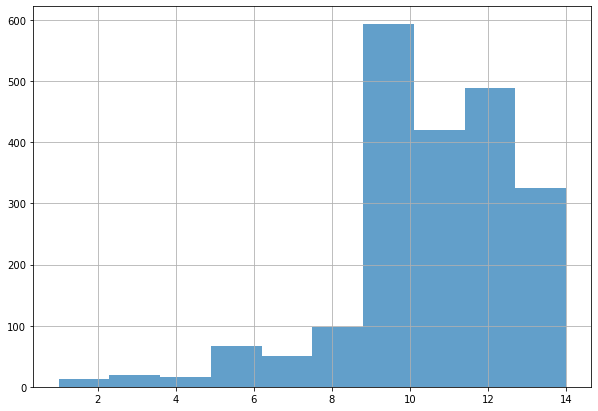

In [91]:
tweeter.rating_numerator.hist(figsize=(10,7), alpha=.7);

In [92]:
print(tweeter.query('dog_stage == "pupper"')['rating_numerator'].mean())
print(tweeter.query('dog_stage == "doggo"')['rating_numerator'].mean())

10.733031674208144
11.847222222222221


In [93]:
print(tweeter.query('dog_stage == "pupper"')['retweet_count'].mean())
print(tweeter.query('dog_stage == "doggo"')['retweet_count'].mean())

2486.0950226244345
6610.361111111111


In [94]:
print(tweeter.query('dog_stage == "pupper"')['favorite_count'].mean())
print(tweeter.query('dog_stage == "doggo"')['favorite_count'].mean())

7249.678733031674
18060.194444444445


#### Insight: Puppers consistently get lowest ratings from we_rate_dogs, as well as the lowest retweet and favorite counts to my surprise! Mean WeRateDogs ratings, retweet counts, and favorite counts for "doggo" are consistently higher than "pupper". Not sure if differences on WeRateDogs ratings would appear as statistically significant, but older, more mature dogs (doggo) seem to be **retweeted or marked** as favorite almost **2.5** times more than younger puppies (pupper)!

In [95]:
subset_dogstages = tweeter[tweeter["dog_stage"].isin(['doggo','pupper', 'puppo', 'floofer'])]
# or use this: 
# subset_dogstages = tweeter[(tweeter["dog_stage"] == 'doggo') | (tweeter["dog_stage"] == 'pupper')]

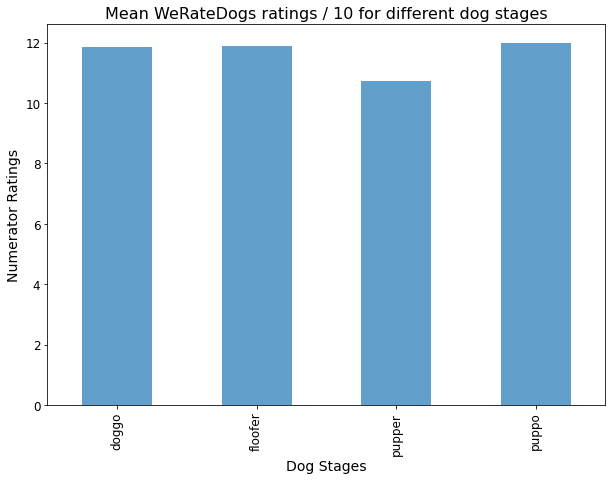

In [1414]:
subset_dogstages.groupby('dog_stage')['rating_numerator'].mean().plot(kind='bar', figsize=[10,7], alpha=.7);
plt.title('Mean WeRateDogs ratings / 10 for different dog stages', fontsize=16);
plt.xlabel ('Dog Stages', fontsize=14)
plt.ylabel ('Numerator Ratings', fontsize=14)
plt.xticks(fontsize=12);  
plt.yticks(fontsize=12);

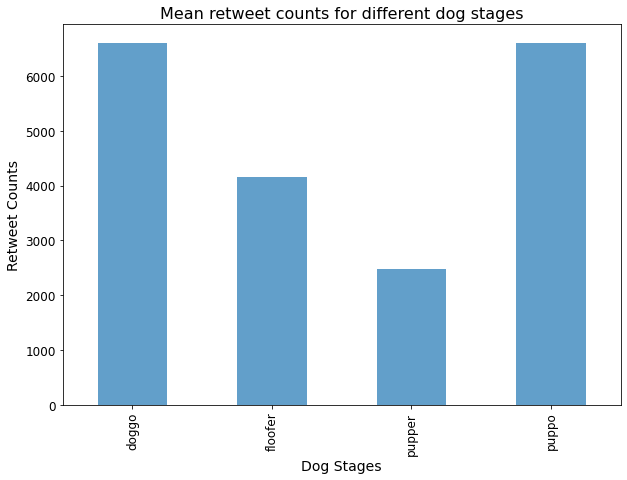

In [1400]:
subset_dogstages.groupby('dog_stage')['retweet_count'].mean().plot(kind='bar', figsize=[10,7], alpha=.7);
plt.title('Mean retweet counts for different dog stages', fontsize=16);
plt.xlabel ('Dog Stages', fontsize=14)
plt.ylabel ('Retweet Counts', fontsize=14)
plt.xticks(fontsize=12);  
plt.yticks(fontsize=12);

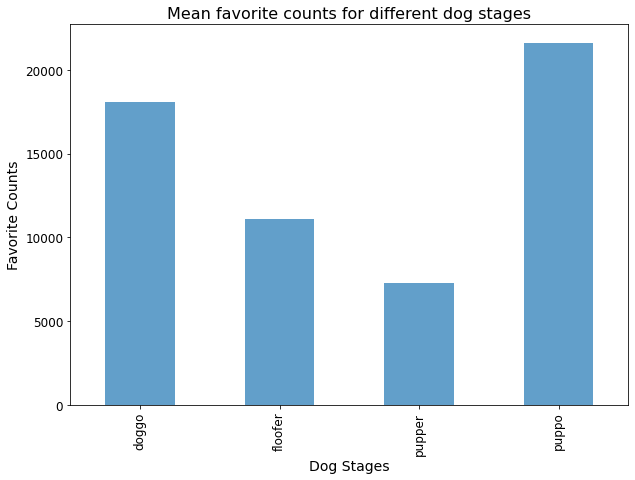

In [1398]:
subset_dogstages.groupby('dog_stage')['favorite_count'].mean().plot(kind='bar', figsize=[10,7], alpha=.7);
plt.title('Mean favorite counts for different dog stages', fontsize=16);
plt.xlabel ('Dog Stages', fontsize=14)
plt.ylabel ('Favorite Counts', fontsize=14)
plt.xticks(fontsize=12);  
plt.yticks(fontsize=12);

##### Insight: puppers consistently get lowest ratings. 
- **Puppers get the lowest rating from WeRateDogs, while other three stages seem to be roughly equal.**
- **Puppers also get the lowest retweet and favorite counts, followed by floofer, and doggo and puppo.** 
- **"Puppo" seems to be retweeted (along with doggo) and marked as favorite *the most*, although their original ratings from WeRateDogs were not higher than that of doggo or floofer. The transitional stage between a child and mature dog seems to be liked the most by the followers.** 

### Q2: ARE HIGH RATED DOGS BY 'WE_RATE_DOGS' ALSO RETWEETED OR FAVOURITED THE MOST? 

Issue: Not all of these tweets belong to dogs but we will assume so here. 

In [1415]:
#https://stackoverflow.com/questions/42579908/use-corr-to-get-the-correlation-between-two-columns
#https://stackoverflow.com/questions/52741236/how-to-calculate-p-values-for-pairwise-correlation-of-columns-in-pandas/52741393#52741393

significance = 0.05

corr_coef = tweeter['retweet_count'].corr(tweeter['favorite_count'], method='pearson')
p_value = tweeter['retweet_count'].corr(tweeter['favorite_count'], method=pearsonr_pval)

print('corr_coef: %0.3f, p_value: %0.3f' % (corr_coef, p_value))

if p_value > significance:
   print ("Fail to reject the null hypothesis")
else:
   print ("Reject the null hypothesis")

corr_coef: 0.912, p_value: 0.000
Reject the null hypothesis


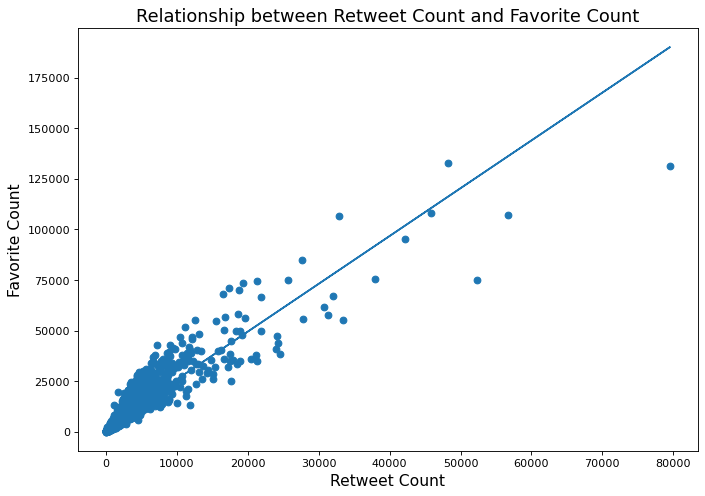

In [1416]:
# Code piece to include the intercept gathered from: https://www.kite.com/python/answers/how-to-plot-a-linear-regression-line-on-a-scatter-plot-in-python

x = tweeter.retweet_count;
y = tweeter.favorite_count;
plt.figure(figsize=(10, 7), dpi=80)
plt.scatter(x,y);
plt.title('Relationship between Retweet Count and Favorite Count', fontsize=16);
plt.xlabel ('Retweet Count', fontsize=14)
plt.ylabel ('Favorite Count', fontsize=14)

m, b = np.polyfit(x, y, 1);  # m = slope, b=intercept
plt.plot(x, m*x + b);  # add line of best fit

#### Insight: There is a very strong correlation between retweet and favorite counts with a correlation coefficient value of 0.912 and a p_value of 0. This means those who choose to retweet a particular tweet also mark them as favorite.


In [1417]:
significance = 0.05

corr_coef = tweeter['rating_numerator'].corr(tweeter['favorite_count'], method='pearson')
p_value = tweeter['rating_numerator'].corr(tweeter['favorite_count'], method=pearsonr_pval)

print('corr_coef: %0.3f, p_value: %0.3f' % (corr_coef, p_value))

if p_value > significance:
   print ("Fail to reject the null hypothesis")
else:
   print ("Reject the null hypothesis")

corr_coef: 0.412, p_value: 0.000
Reject the null hypothesis


Text(0, 0.5, 'Favorite Count')

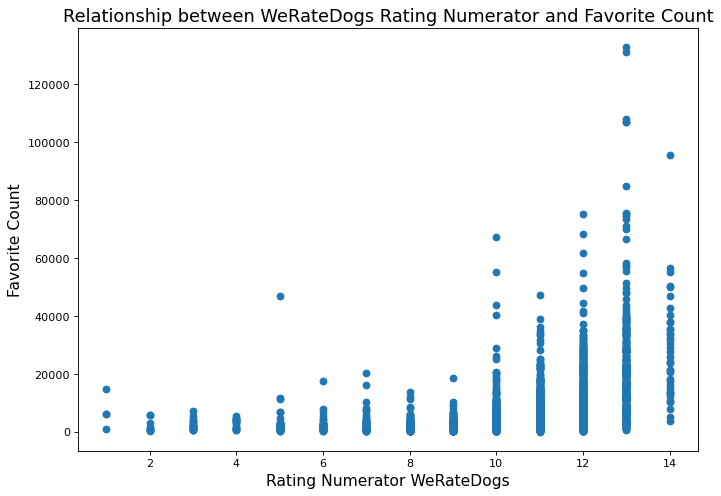

In [1418]:
x = tweeter.rating_numerator;
y = tweeter.favorite_count;
plt.figure(figsize=(10, 7), dpi=80)
plt.scatter(x,y);
plt.title('Relationship between WeRateDogs Rating Numerator and Favorite Count', fontsize=16);
plt.xlabel ('Rating Numerator WeRateDogs', fontsize=14)
plt.ylabel ('Favorite Count', fontsize=14)

#### Insight: There is a moderate size correlation between the ratings from WeRateDogs and favorite counts from the users with a correlation coefficient value of 0.412 and a p_value of 0. The users seem to be more likely to mark those tweets with higher ratings as "favorite".

### Q3: WHICH DOG BREED IS THE MOST COMMON AND WHICH DOG BREED GET THE HIGHEST FAVORITE COUNTS?

In [103]:
tweeter.breed_pred.value_counts()

golden_retriever       119
pembroke               80 
labrador_retriever     76 
chihuahua              54 
pug                    47 
                       .. 
irish_water_spaniel    1  
norwich_terrier        1  
ibizan_hound           1  
sussex_spaniel         1  
standard_schnauzer     1  
Name: breed_pred, Length: 105, dtype: int64

**Issue: There are many breeds with very small counts so let's remove them for ease of visualization, and create a subset with those counts larger than 10.**

In [104]:
# Code to subset the dataframe from:
# https://stackoverflow.com/questions/44329734/filtering-dataframe-based-on-column-value-counts-pandas?noredirect=1&lq=1
subset_dog_breeds = tweeter[tweeter.groupby('breed_pred')['breed_pred'].transform('size') > 10]


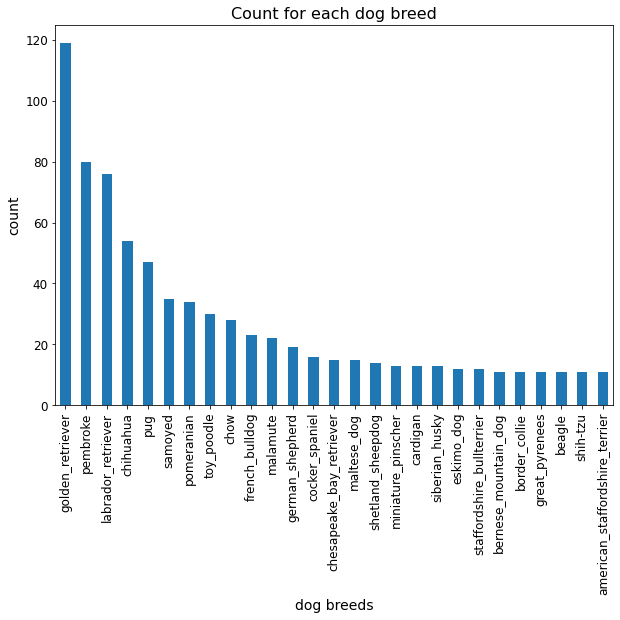

In [105]:
subset_dog_breeds['breed_pred'].value_counts().plot(kind='bar', figsize=[10,7]);
plt.title('Count for each dog breed', fontsize=16);
plt.xlabel ('dog breeds', fontsize=14);
plt.ylabel ('count', fontsize=14);
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);

#### Insight: Golder retriever is the most common dog breed, followed by pembroke! 

In [106]:
print(tweeter.query('breed_pred == "golden_retriever"')['rating_numerator'].mean())
print(tweeter.query('breed_pred == "pug"')['rating_numerator'].mean())

11.579831932773109
10.23404255319149


In [107]:
print(tweeter.query('breed_pred == "golden_retriever"')['favorite_count'].mean())
print(tweeter.query('breed_pred == "pug"')['favorite_count'].mean())

12519.495798319327
5035.106382978724


#### Insight: Comparing the mean ratings from WeRateDogs for golder retriever vs. pug, two different dog breeds, Golden gets higher ratings. Golden-Retriever is also marked as favorite almost 2.5 times more frequently than a pug.

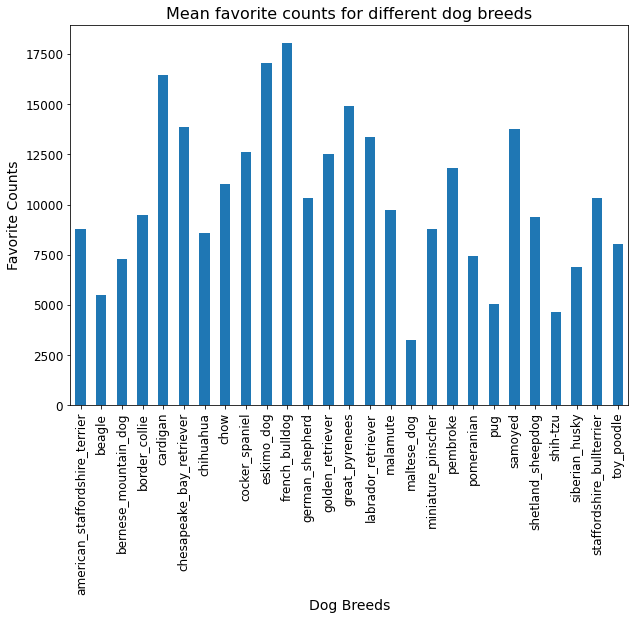

In [108]:
subset_dog_breeds.groupby('breed_pred')['favorite_count'].mean().plot(kind='bar', figsize=[10,7]);
plt.title('Mean favorite counts for different dog breeds', fontsize=16);
plt.xlabel ('Dog Breeds', fontsize=14)
plt.ylabel ('Favorite Counts', fontsize=14)
plt.xticks(fontsize=12);  
plt.yticks(fontsize=12);

#### Insight: French bulldogs seem to get the "highest" favorite counts, followed by eskimo dogs and cardigans! We can also again see than golden retrievers get almost 2.5 more counts compared to pugs. 